#### Imports

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, mannwhitneyu

#### Load errors

In [36]:
rndm_wave = np.load('errors_list_random_wave_recon.npy')
rndm_flip = np.load('errors_list_random_flipflop.npy')
rndm_mnist = np.load('errors_list_random_seq_mnist.npy')

tppb_wave = np.load('errors_list_topprob_wave_recon.npy')
tppb_flip = np.load('errors_list_topprob_flipflop.npy')
tppb_mnist = np.load('errors_list_topprob_seq_mnist.npy')

In [37]:
# Perform significance test
tasks = ['Flip-flop', 'Wave reconstruction', 'Sequential MNIST']
data_random = [rndm_flip, rndm_wave, rndm_mnist]
data_topprob = [tppb_flip, tppb_wave, tppb_mnist]

Max Means1 (Random Pruning): [0.5040642517968081, 0.15540214680756131, 4.782941165566444]
Max Means2 (Top-Prob Pruning): [0.3839351092853273, 0.1514391491189599, 2.95260539551576]
Error1 (Max CI): [0.04917505095317185, 0.02053198902555425, 0.3768621782901214]
Error2 (Max CI): [0.07328720120351206, 0.024479497648058752, 0.44498121605085333]
Aggregated P-Values: [0.012185780355344813, 0.02157174794772092, 0.012185780355344813]
Significance Labels: ['*', '*', '*']


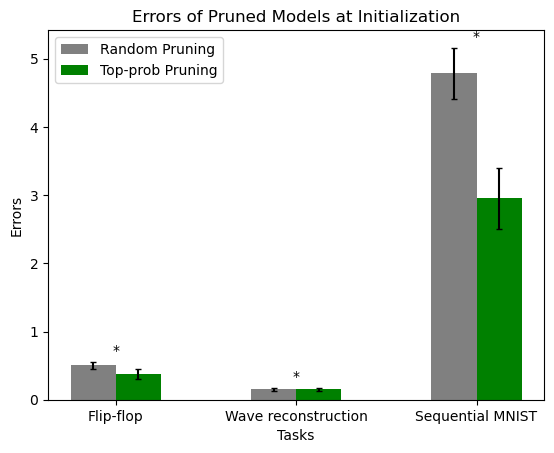

In [42]:
from scipy.stats import sem, norm

# Define confidence level
confidence_level = 0.95
z = norm.ppf(1 - (1 - confidence_level) / 2)  # Critical value for 95% confidence

# Aggregate means across runs and sparsities
means1 = [np.max(np.mean(rndm, axis=1)) for rndm in data_random]  # Max mean error across sparsities
means2 = [np.max(np.mean(tppb, axis=1)) for tppb in data_topprob]

# Calculate SEM and take max SEM across sparsities
sem1 = [sem(rndm.flatten()) for rndm in data_random]  # Flatten for all values across sparsities
sem2 = [sem(tppb.flatten()) for tppb in data_topprob]

# Confidence intervals using max SEM
error1 = [z * s for s in sem1]
error2 = [z * s for s in sem2]

# Take minimum p-value across sparsities for significance
aggregated_p_values = [np.min(p_array) for p_array in p_values]
# aggregated_p_values = [np.mean(p_array) for p_array in p_values]
significance_labels = ['*' if p < 0.05 else 'ns' for p in aggregated_p_values]

# Debug: Print results for verification
print("Max Means1 (Random Pruning):", means1)
print("Max Means2 (Top-Prob Pruning):", means2)
print("Error1 (Max CI):", error1)
print("Error2 (Max CI):", error2)
print("Aggregated P-Values:", aggregated_p_values)
print("Significance Labels:", significance_labels)

# Plot with maximum-based confidence intervals
bar_width = 0.25
r1 = np.arange(len(tasks))
r2 = [x + bar_width for x in r1]

f_errors_pruning = plt.figure()

plt.bar(r1, means1, yerr=error1, capsize=2, width=bar_width, label='Random Pruning', color='grey')
plt.bar(r2, means2, yerr=error2, capsize=2, width=bar_width, label='Top-prob Pruning', color='g')

# Add significance annotations
for i, (r1_pos, r2_pos, label) in enumerate(zip(r1, r2, significance_labels)):
    y = max(means1[i] + error1[i], means2[i] + error2[i]) + 0.1
    plt.text((r1_pos + r2_pos) / 2, y, label, ha='center', color='black')

plt.xlabel('Tasks')
plt.xticks([r + bar_width/2 for r in range(len(tasks))], tasks)
plt.ylabel('Errors')
plt.title('Errors of Pruned Models at Initialization')
plt.legend()
plt.show()

In [44]:
f_errors_pruning.savefig('pruning_errors_init.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
